# Overview

In recent times, the number of fraud transactions has increased drastically due to which credit card companies are facing a lot of challenges. For many banks, retaining high profitable customers is the most important business goal. Banking fraud, however, poses a significant threat to this goal. In terms of substantial financial loss, trust, and credibility, banking fraud is a concerning issue for both banks and customers alike. With the rise in digital payment channels, the number of fraudulent transactions is also increasing as fraudsters are finding new and different ways to commit such crimes.

Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.

# Problem Statement

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

# Importing important libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import missingno as msno

#Sklearn
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import linear_model, metrics
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image

#Others
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Setting the number of rows and columns visible...
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)

# Reading the important data

In [4]:
# naming the table as 'data' for the fraudTrain...
data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
# naming the table as 'unseen' for the fraudTest...
unseen = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [5]:
# Let's read the train data...
data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
# Let's read the test data...
unseen.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,57374,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


According to the above tables is_fraud column will be our target variable.

In [7]:
# Let's check the shape of both dataframes...
print(data.shape)
print(unseen.shape)

(1296675, 23)
(555719, 23)


# Analysing the data

In [8]:
# Describing the data
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# Checking data's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
# Describingt the unseen data
unseen.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [11]:
# Checking unseen data's info
unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Data Pre-processing and Cleaning

In this section we will be Altering the data and remove columns which won't come in handy for future analysis.

In [12]:
#concatenating the two datasets
df = pd.concat([data, unseen]).reset_index()

# Dropping the first unamed column...
df.drop(df.columns[:2], axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
# Converting date columns to datetime format
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [14]:
# Checking the info of the combined table...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [15]:
#let us look at the number of unique values in the dataset
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
trans_date                   730
dtype: int64

Now, since there are a lot of unique values in the 'trans_date_trans_time' column, we will now separate the column into hour, day, and Month-year, in order to get more information from the column and attach these additonal columns to our original dataframe

In [16]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,Tuesday,2019-01


In [17]:
#converting 'dob' column to datetime to find age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - 
                      df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

In [18]:
# Let's have a look at the missing data...
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
trans_hour               0
trans_day_of_week        0
trans_year_month         0
age                      0
dtype: int64

Since there are no null values we can move ahead for Analysis.

# EDA

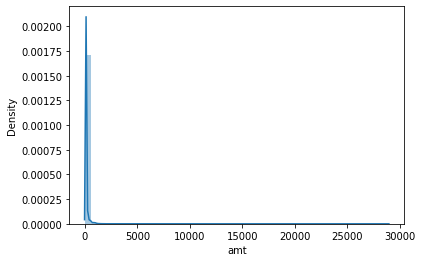

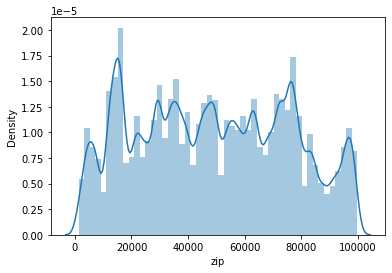

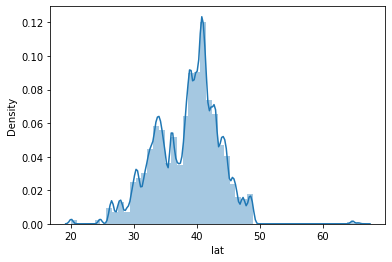

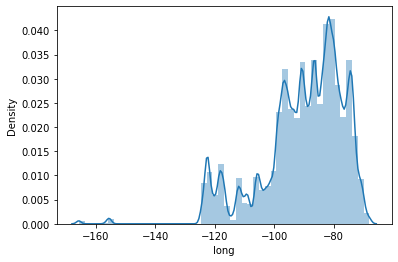

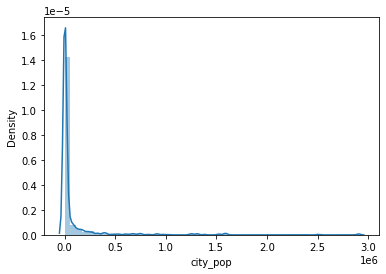

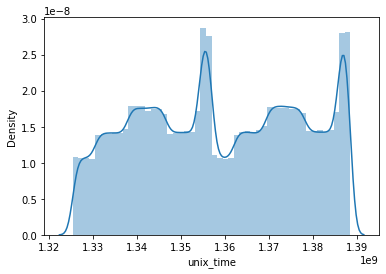

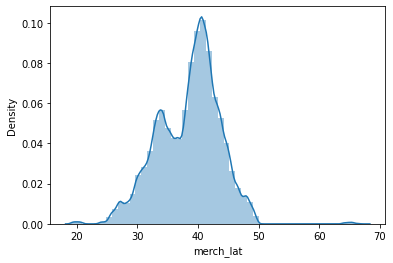

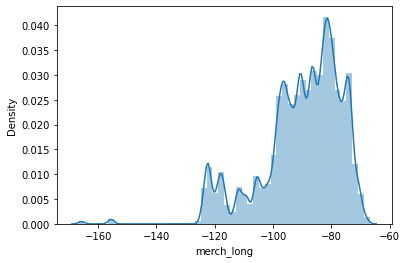

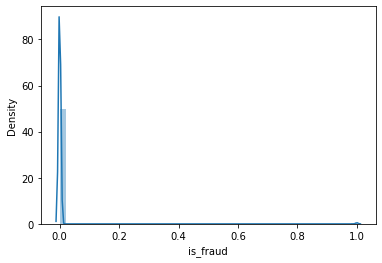

In [19]:
# Setting numerical columns...
cred_numer_col = df [["amt","zip","lat","long","city_pop","unix_time","merch_lat","merch_long","is_fraud"]]

for c in cred_numer_col:
    sns.set_style(style=None, rc=None)
    sns.distplot(df[c])
    plt.show();

In [20]:
# Setting Categorical columns 
categorical_col = df.select_dtypes(exclude=['int64','datetime64[ns]','float'])
cred_fraud_plot = df[["category","gender","is_fraud"]]
cred_fraud_plot_2 = df[["state","job","city","merchant"]]

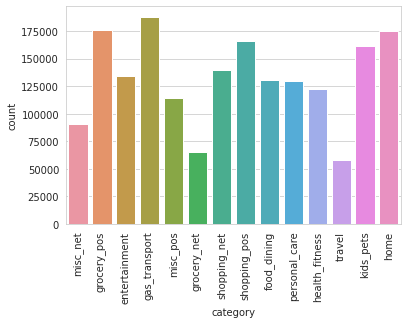

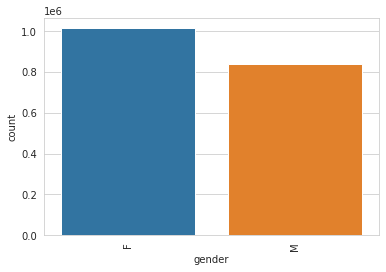

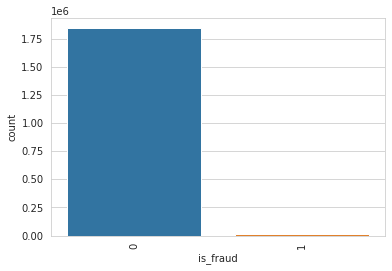

In [21]:
for c in cred_fraud_plot:
    sns.set_style("whitegrid")
    sns.countplot(df[c])
    plt.xticks(rotation = 90)
    plt.show();

From the above graphs we can notice that:
 1. Highest number of transactrions are done for gas_transport while least are done for travelling.
 2. Female has done more treansactions as compared to the male.
 3. Out of all the transactions the gap between is_fraud being true and fasle is very high as in real life frauds are not commited as often.

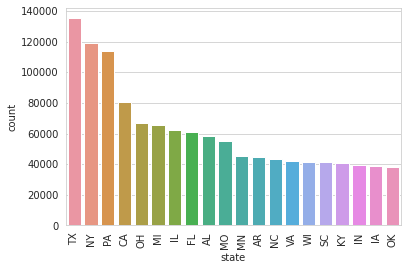

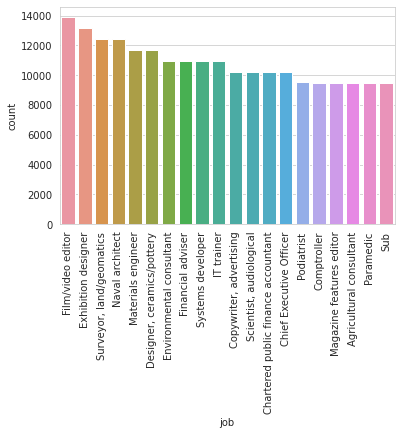

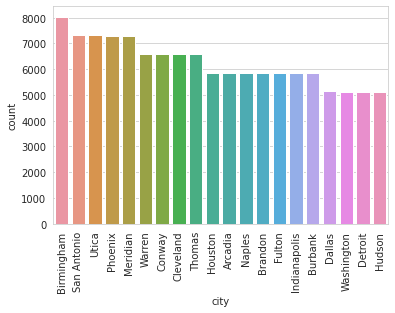

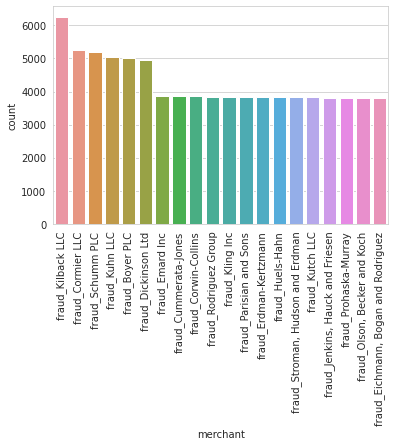

In [22]:
for c in cred_fraud_plot_2:
    sns.set_style("whitegrid")
    sns.countplot((df[c]), order=df[c].value_counts().iloc[:20].index)
    plt.xticks(rotation = 90)
    plt.show();

From the above graphs we can say that:
    1. Texas (TX) is the state with the highest transactions while Oklahoma (OK) has the least.
    2. Highest transactions are done by the people in film/video editor occupation.
    3. Birmingham is the city with the highest transactions.
    4. fraud_killback LLC seems to be the most popular agency for fraud detection.

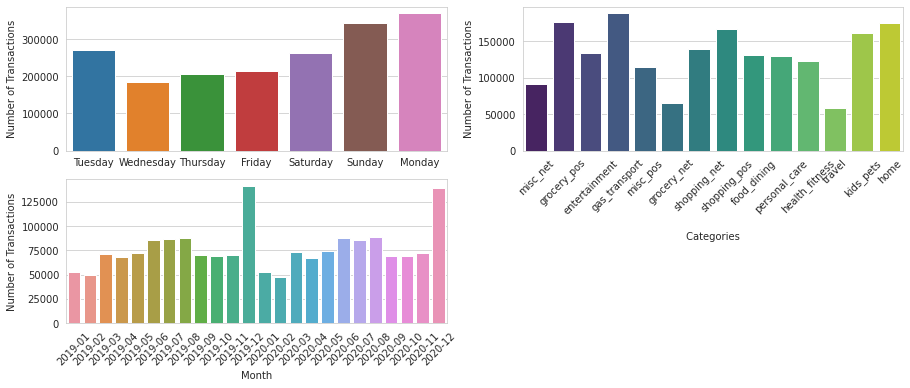

In [23]:
#distribution of transactions made on days of week

plt.figure(figsize=(15,9))
plt.subplot(3,2,1)
sns.countplot(df["trans_day_of_week"])
plt.xlabel("\n Days of week \n")
plt.ylabel("Number of Transactions")

plt.subplot(3,2,2)
sns.countplot(df["category"],palette="viridis")
plt.xlabel("\n Categories \n")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

plt.subplot(3,2,3)
sns.countplot(df["trans_year_month"])
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

plt.show()

From the above graph we can conclude that:
1. Most transactions are done around Monday.
2. The month with the higest transactions were decmber 2019 followed by december 2020 as that is the holiday month and allot of people like to shop around those months.

In [24]:
#creating new dataframe to analysi=e data based on category
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

#df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category.head()

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702


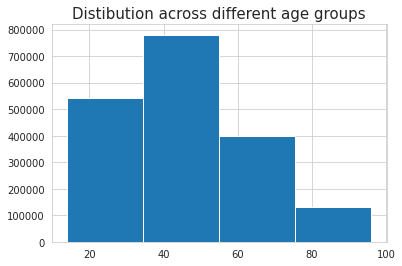

In [25]:
#distribution of fraud among different age groups

plt.hist(df.age, bins = 4)
plt.title("Distibution across different age groups", fontdict = {"fontsize" : 15})
plt.show()

Age group between 40 to 60 has the highest transactions taking it as they are well settled people around that age.

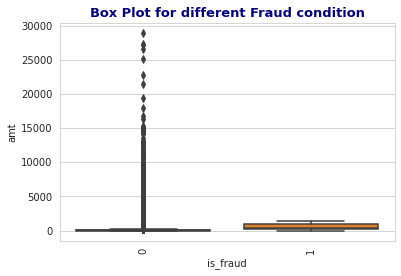

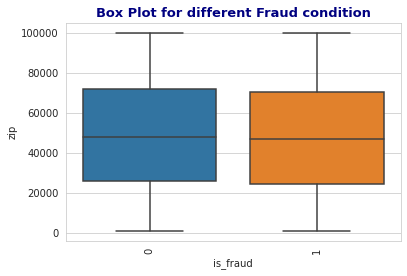

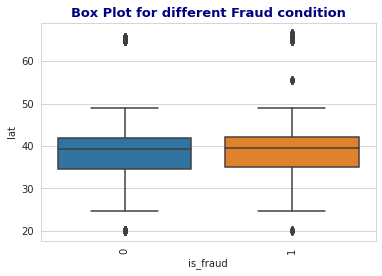

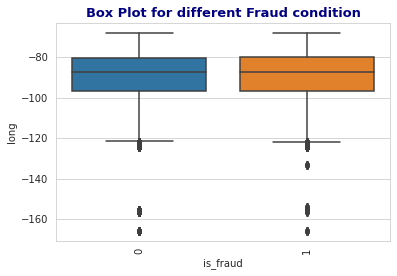

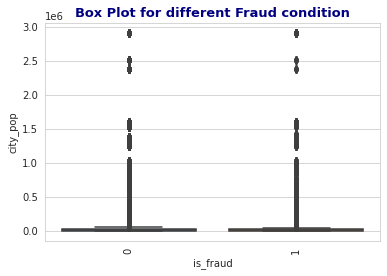

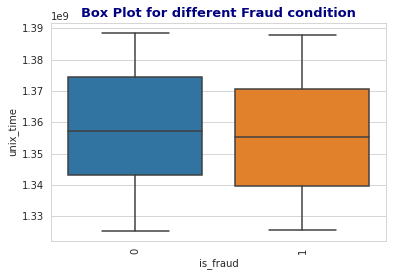

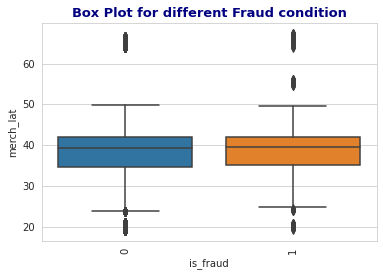

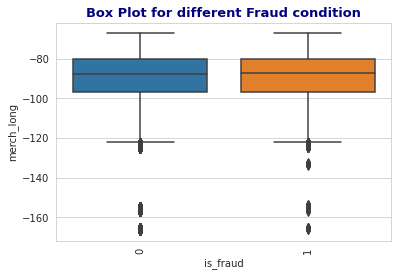

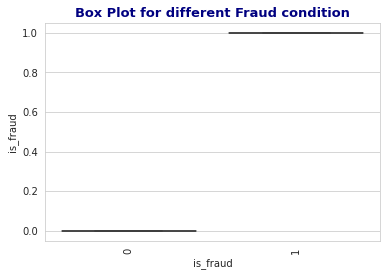

In [26]:
for c in cred_numer_col:
    sns.set_style("whitegrid")
    sns.boxplot(y = df[c], x = "is_fraud", data = cred_numer_col)
    plt.title("Box Plot for different Fraud condition",fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    plt.show();

From the above multiple boxplots it is safe to say the amount ogf actual fraud is very less.

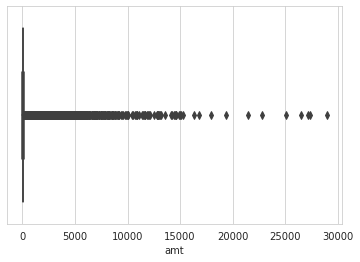

In [27]:
ax = sns.boxplot(x=df["amt"])
plt.show();

Accordng to the boxplot the outlier indicates that there are many customers that the amount exceeds the average. Reasons could be good income or longterm savings.

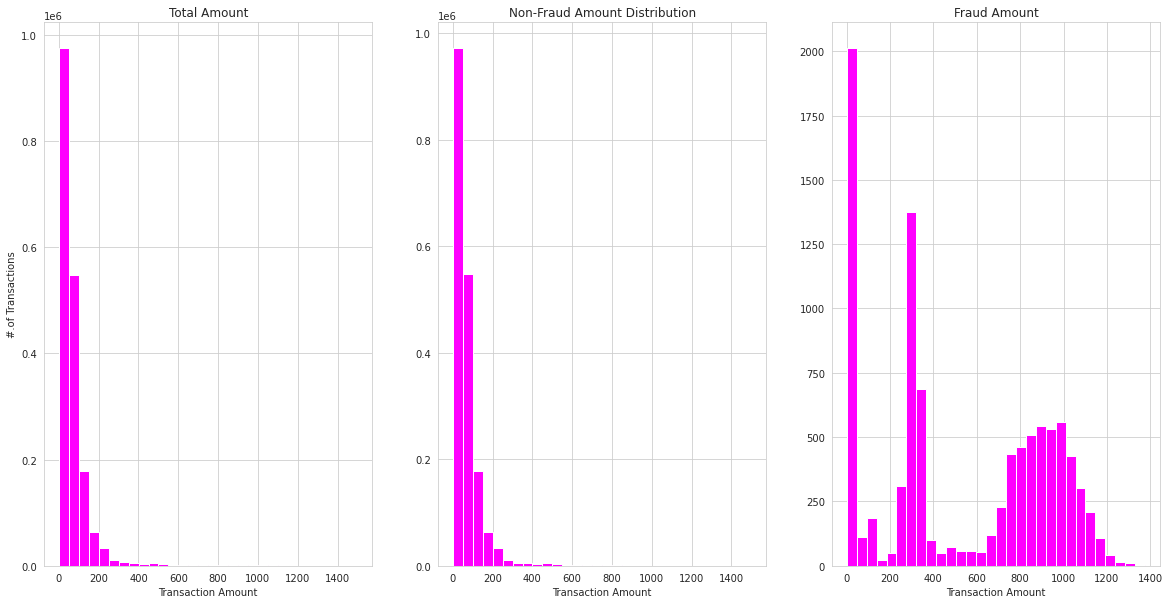

In [28]:
#distribution of transactions amount by different fraudulent  and non-fraudulent categories

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=30,color='magenta')
ax[0].set_title('Total Amount')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[1].set_title('Non-Fraud Amount Distribution')
ax[1].set_xlabel('Transaction Amount')

ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[2].set_title('Fraud Amount')
ax[2].set_xlabel('Transaction Amount')

plt.show()


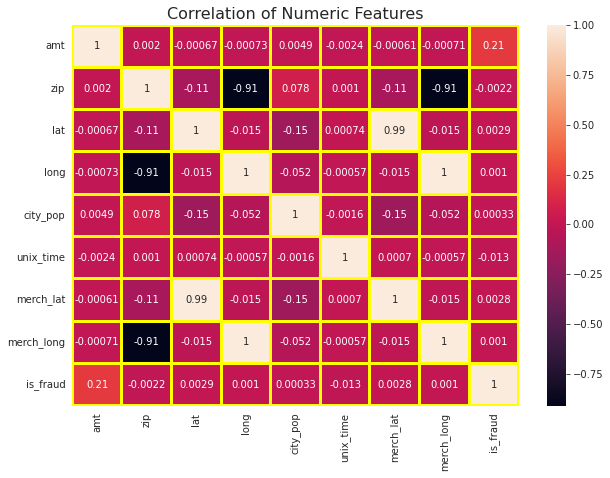

In [29]:
f , ax = plt.subplots(figsize = (10,7))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(cred_numer_col.corr(),linewidths=2, linecolor='yellow', vmax =1,annot= True)
plt.show()

There's a very high negative correlation between zip and long as well as zip and merch_long which is inverse. 

In [30]:
# Dropping fields not necessary for model building

drop_cols = ['cc_num','merchant','street','zip','trans_num','unix_time']

df = df.drop(drop_cols,axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   first                  object        
 4   last                   object        
 5   gender                 object        
 6   city                   object        
 7   state                  object        
 8   lat                    float64       
 9   long                   float64       
 10  city_pop               int64         
 11  job                    object        
 12  dob                    datetime64[ns]
 13  merch_lat              float64       
 14  merch_long             float64       
 15  is_fraud               int64         
 16  trans_date             datetime64[ns]
 17  trans_hour             int64         
 18  trans_day_of_week     

Text(0.7, 0.5, '0.521%')

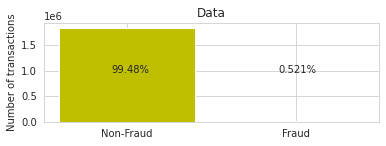

In [31]:
# Checking Class Imbalance

classes=df['is_fraud'].value_counts()
normal_share=classes[0]/df['is_fraud'].count()*100
fraud_share=classes[1]/df['is_fraud'].count()*100


plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes, color=['y','b'])
plt.title('Data')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')

There's a huge class imbalance between Fraud and Non-Fraud. The reason could be that in real life scenario it is very uncommon for such frauds to take place.

In [32]:
fraud_city = pd.DataFrame(df.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Adams', 'Afton', 'Akron', 'Albany', 'Albuquerque', 'Alder', 'Aledo',
       'Alexandria',
       ...
       'Winger', 'Winnsboro', 'Winslow', 'Winter', 'Winthrop', 'Wittenberg', 'Woodville',
       'Yellowstone National Park', 'Zaleski', 'Zavalla'],
      dtype='object', name='city', length=887)

In [33]:
fraud_state = pd.DataFrame(df.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [34]:
fraud_job = pd.DataFrame(df.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered', 'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician', 'Acupuncturist',
       'Administrator', 'Administrator, arts', 'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Visual merchandiser', 'Volunteer coordinator', 'Warden/ranger', 'Warehouse manager',
       'Waste management officer', 'Water engineer', 'Water quality scientist', 'Web designer',
       'Wellsite geologist', 'Writer'],
      dtype='object', name='job', length=494)

In [35]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],3))
df['long_dist'] = abs(round(df['merch_long']-df['long'],3))

df[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


## Checking if there are any highly skewed categorical variables

In [36]:
round(df['category'].value_counts()/len(df.index)*100,2)

gas_transport     10.15
grocery_pos        9.51
home               9.47
shopping_pos       8.99
kids_pets          8.73
shopping_net       7.52
entertainment      7.24
food_dining        7.06
personal_care      7.02
health_fitness     6.62
misc_pos           6.17
misc_net           4.89
grocery_net        3.50
travel             3.13
Name: category, dtype: float64

In [37]:
round(df['gender'].value_counts()/len(df.index)*100,2)

F    54.78
M    45.22
Name: gender, dtype: float64

In [38]:
round(df['city'].value_counts()/len(df.index)*100,2)

Birmingham     0.43
San Antonio    0.39
Utica          0.39
Phoenix        0.39
Meridian       0.39
               ... 
Chattanooga    0.00
Karns City     0.00
Vacaville      0.00
Streator       0.00
Wever          0.00
Name: city, Length: 906, dtype: float64

In [39]:
round(df['state'].value_counts()/len(df.index)*100,2)

TX    7.30
NY    6.45
PA    6.16
CA    4.35
OH    3.60
MI    3.55
IL    3.36
FL    3.28
AL    3.16
MO    2.96
MN    2.45
AR    2.41
NC    2.33
VA    2.25
WI    2.25
SC    2.25
KY    2.21
IN    2.13
IA    2.09
OK    2.05
MD    2.02
GA    2.02
WV    1.97
NJ    1.90
NE    1.86
KS    1.78
MS    1.62
LA    1.62
WY    1.50
WA    1.46
OR    1.43
TN    1.34
ME    1.27
NM    1.26
ND    1.14
CO    1.07
SD    0.95
MA    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.63
CT    0.59
NV    0.44
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [40]:
round(df['job'].value_counts()/len(df.index)*100,2)

Film/video editor             0.75
Exhibition designer           0.71
Surveyor, land/geomatics      0.67
Naval architect               0.67
Materials engineer            0.63
                              ... 
Veterinary surgeon            0.00
Engineer, water               0.00
Contracting civil engineer    0.00
Ship broker                   0.00
Warehouse manager             0.00
Name: job, Length: 497, dtype: float64

# Model Building

Now we will mold the dats is a way that it will be usefull during model building.

In [41]:
# Creating month column

df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
df[['trans_date_trans_time','trans_month']].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [42]:
# Dropping variables not useful for model building

drop_cols = ['trans_date_trans_time','dob','first','last','city','lat','long','job','merch_lat',
             'merch_long','trans_date','trans_day_of_week','trans_year_month']
df = df.drop(drop_cols,axis=1)
df.head()

,category,amt,gender,state,city_pop,is_fraud,trans_hour,age,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,0,31.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,0,41.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,0,57.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,0,52.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,0,33.0,0.254,0.830,1


In [43]:
#Binary mapping on Gender
  
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df.head()

,category,amt,gender,state,city_pop,is_fraud,trans_hour,age,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,0,31.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,0,41.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,0,57.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,0,52.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,0,33.0,0.254,0.830,1


In [44]:
df[['amt','city_pop','age','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age,lat_dist,long_dist
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,8.864367e+04,4.626617e+01,5.002689e-01,5.002850e-01
std,1.592540e+02,3.014876e+05,1.741239e+01,2.885700e-01,2.888276e-01
min,1.000000e+00,2.300000e+01,1.400000e+01,0.000000e+00,0.000000e+00
25%,9.640000e+00,7.410000e+02,3.300000e+01,2.500000e-01,2.500000e-01
50%,4.745000e+01,2.443000e+03,4.400000e+01,5.010000e-01,5.000000e-01
75%,8.310000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.500000e-01
90%,1.363300e+02,1.861400e+05,7.100000e+01,9.000000e-01,9.000000e-01
95%,1.953400e+02,5.257130e+05,8.000000e+01,9.500000e-01,9.500000e-01
99%,5.379000e+02,1.577385e+06,9.200000e+01,9.900000e-01,9.900000e-01


### Creating Dummy Variable

In [45]:
# Creating dummy variables for Category

df = pd.get_dummies(df,columns=['category'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   state                    object 
 3   city_pop                 int64  
 4   is_fraud                 int64  
 5   trans_hour               int64  
 6   age                      float64
 7   lat_dist                 float64
 8   long_dist                float64
 9   trans_month              int64  
 10  category_food_dining     uint8  
 11  category_gas_transport   uint8  
 12  category_grocery_net     uint8  
 13  category_grocery_pos     uint8  
 14  category_health_fitness  uint8  
 15  category_home            uint8  
 16  category_kids_pets       uint8  
 17  category_misc_net        uint8  
 18  category_misc_pos        uint8  
 19  category_personal_care   uint8  
 20  category_shopping_net    uint8  
 21  category

In [46]:
# Dropping State

df = df.drop('state',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   trans_hour               int64  
 5   age                      float64
 6   lat_dist                 float64
 7   long_dist                float64
 8   trans_month              int64  
 9   category_food_dining     uint8  
 10  category_gas_transport   uint8  
 11  category_grocery_net     uint8  
 12  category_grocery_pos     uint8  
 13  category_health_fitness  uint8  
 14  category_home            uint8  
 15  category_kids_pets       uint8  
 16  category_misc_net        uint8  
 17  category_misc_pos        uint8  
 18  category_personal_care   uint8  
 19  category_shopping_net    uint8  
 20  category_shopping_pos    uint8  
 21  category

### Train Test Split

In [47]:
# Independent and dependent variable
X = df.drop(['is_fraud'], axis=1) 
y = df.is_fraud

#### Standard Scaling

In [48]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1389295, 21), (463099, 21), (1389295,), (463099,))

## Logistic Regression

In [51]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [52]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693


### Impacts of Imbalance:
1. It can be seen that although we have not balanced the classes in our target variable, the accuracy and several other metrics seem to look great.
2. This is because, since there is no balance in the dataset at this point, the model predicts almost all data points as 'not fraud'.


In [53]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

0    0.994738
1    0.005262
Name: is_fraud, dtype: float64

In [54]:
#storing the numerical columns of the data...
df_num = df.select_dtypes(include='number')

#storing all fraud transactions
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (9651, 22)
non fraud data shape:  (1842743, 22)
Fraud Data percentage:  0.5237301132062366


As we can see that the number of fraudulent transactions are only about 0.5% of the total dataset, which means that the dataframe is highly imbalanced.

This also indicates to the fact that in real life scenario actual amount of fraud are very minimal.

In [55]:
# Importing libraries to handle class imbalance

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### Undersampling - Random Undersampling

In [56]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    7214
1    7214
Name: is_fraud, dtype: int64

In [57]:
# Splitting train test
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

In [58]:
y_train.value_counts()

1    5050
0    5049
Name: is_fraud, dtype: int64

In [59]:
#creating a baseline linear model after under sampling
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 0, 1])

In [60]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    460662
           1       0.03      0.76      0.06      2437

    accuracy                           0.88    463099
   macro avg       0.51      0.82      0.50    463099
weighted avg       0.99      0.88      0.93    463099



In [62]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309


The accuracy, training score, testing score and the F1 score metrics have dropped but the precision and recall have improved which makes the model more balanced.

### Oversampling - Random Over Sampling

In [63]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

y_ros.value_counts()

0    5050
1    5050
Name: is_fraud, dtype: int64

In [64]:
#train Test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, stratify=y_ros, random_state=42)
y_train.value_counts()

1    3535
0    3535
Name: is_fraud, dtype: int64

In [65]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    460662
           1       0.03      0.76      0.06      2437

    accuracy                           0.88    463099
   macro avg       0.52      0.82      0.50    463099
weighted avg       0.99      0.88      0.93    463099



In [68]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540


### Oversampling - SMOTE method

In [69]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

1    3535
0    3535
Name: is_fraud, dtype: int64

In [70]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
y_train.value_counts()

1    2475
0    2474
Name: is_fraud, dtype: int64

In [71]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 0, 1, 0])

In [72]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    460662
           1       0.03      0.76      0.06      2437

    accuracy                           0.88    463099
   macro avg       0.52      0.82      0.50    463099
weighted avg       0.99      0.88      0.93    463099



In [74]:
#evaluating the model
model_name = 'Logistic Regression - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361


Random over sampling is the best model so far due to the balanced score and also while it is close to Random under sampling it is less risky as under sampling can lead to loss of data.

## Building a Random Forest Model

In [75]:
# Importing required library

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
model = rf.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.93      0.56      0.70      2938

    accuracy                           1.00    555719
   macro avg       0.97      0.78      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [77]:
#evaluating the model
model_name = 'Random Forest - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361
4,Random Forest - without balancing,0.997465,0.997461,0.997461,0.997144,0.933560,0.559564


### Undersampling

In [78]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
model = rf.fit(X_train,y_train)
test_pred = model.predict(test_input)
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    460662
           1       0.09      0.91      0.16      2437

    accuracy                           0.95    463099
   macro avg       0.54      0.93      0.57    463099
weighted avg       0.99      0.95      0.97    463099



In [79]:
#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361
4,Random Forest - without balancing,0.997465,0.997461,0.997461,0.997144,0.933560,0.559564
5,Random Forest - Random Under Sampling,0.929498,0.939247,0.949451,0.969656,0.087328,0.910546


### Oversampling

In [80]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
model = rf.fit(X_train,y_train)
test_pred = model.predict(test_input)
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    460662
           1       0.10      0.90      0.17      2437

    accuracy                           0.95    463099
   macro avg       0.55      0.93      0.58    463099
weighted avg       0.99      0.95      0.97    463099



In [81]:
#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361
4,Random Forest - without balancing,0.997465,0.997461,0.997461,0.997144,0.933560,0.559564
5,Random Forest - Random Under Sampling,0.929498,0.939247,0.949451,0.969656,0.087328,0.910546
6,Random Forest - Random Over Sampling,0.930552,0.926403,0.954750,0.972513,0.096100,0.903980


### SMOTE

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
model = rf.fit(X_train,y_train)
test_pred = model.predict(test_input)
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    460662
           1       0.05      0.93      0.09      2437

    accuracy                           0.90    463099
   macro avg       0.52      0.92      0.52    463099
weighted avg       0.99      0.90      0.94    463099



In [83]:
#evaluating the model
model_name = 'Random Forest - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361
4,Random Forest - without balancing,0.997465,0.997461,0.997461,0.997144,0.933560,0.559564
5,Random Forest - Random Under Sampling,0.929498,0.939247,0.949451,0.969656,0.087328,0.910546
6,Random Forest - Random Over Sampling,0.930552,0.926403,0.954750,0.972513,0.096100,0.903980
7,Random Forest - SMOTE,0.919580,0.909477,0.902097,0.943750,0.047695,0.928190


* Out of all the following models Random Forest is the best model due to the high accuracy as well as balanced other factors as well.
* Random over Sampling seems to be the most efficient option for the Random Forest.
* However, we will use the SMOTE sampling algorithm for our model. This is because, unlike the random over sampling algorithm which just creates duplicates of existing values, SMOTE algorithm creates values according to its neighbours. Therefore, SMOTE algorithm is much more reliable for model building.

### Hyper-parameter Tuning for Random Forest

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [85]:
#implementing Grid Search CV on Random Forest classifier
rf = RandomForestClassifier()

clf = GridSearchCV(rf, grid, cv=5, n_jobs=-1, verbose=4, return_train_score=True)

#fitting the model
clf.fit(X_train, y_train)

cv_result = pd.DataFrame(clf.cv_results_)
print(cv_result)

print('Best params: ',clf.best_params_)
print('Best score: ', clf.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth  \
0         0.346249      0.009480         0.020688        0.000854              10   
1         0.693688      0.016411         0.037112        0.001414              10   
2         1.051584      0.012464         0.056537        0.007380              10   
3         1.364933      0.006951         0.071587        0.005122              10   
4         0.347465      0.003887         0.020447        0.000486              10   
..             ...           ...              ...             ...             ...   
427       1.438323      0.009378         0.073363        0.000577            None   
428       0.360292      0.007937         0.021384        0.001201            None   
429       0.721553      0.014236         0.038344        0.000543            None   
430       1.069848      0.009715         0.055723        0.000848            None   
4

* The best parameters are: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
* Let us now train the model with the best parameters found using GridSearchCV.

In [86]:
best_grid = RandomForestClassifier(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

model = best_grid.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE [Hyperparameter Tuned]'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    460662
           1       0.16      0.96      0.27      2437

    accuracy                           0.97    463099
   macro avg       0.58      0.97      0.63    463099
weighted avg       1.00      0.97      0.98    463099



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.994466,0.994373,0.994373,0.991967,0.048128,0.003693
1,Logistic Regression - Random Under Sampling,0.816715,0.815662,0.875573,0.928781,0.031385,0.758309
2,Logistic Regression - Random Over Sampling,0.820085,0.810891,0.878041,0.930188,0.032055,0.759540
3,Logistic Regression - SMOTE,0.819560,0.825554,0.879237,0.930868,0.032399,0.760361
4,Random Forest - without balancing,0.997465,0.997461,0.997461,0.997144,0.933560,0.559564
5,Random Forest - Random Under Sampling,0.929498,0.939247,0.949451,0.969656,0.087328,0.910546
6,Random Forest - Random Over Sampling,0.930552,0.926403,0.954750,0.972513,0.096100,0.903980
7,Random Forest - SMOTE,0.919580,0.909477,0.902097,0.943750,0.047695,0.928190
8,Random Forest - SMOTE [Hyperparameter Tuned],1.000000,0.964168,0.972729,0.982339,0.157343,0.960197


# Cost Benefit Analysis

In [87]:
# Subset of data

data_merge = data[['trans_date_trans_time','amt','trans_num','is_fraud']]
data_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [88]:
# Creating dataframe of y_train_pred

data_pred = pd.DataFrame(y_train_pred)
data_pred.head()

,0
0,1
1,1
2,0
3,0
4,1


In [89]:
# Merging the two dataframes

data_final = pd.concat([data_merge, data_pred],axis=1)
data_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,1.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,1.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,1.0


In [90]:
# Renaming column

data_final= data_final.rename(columns={ 0 : 'is_fraud_pred'})
data_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,1.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,1.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,1.0


In [91]:
data_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [92]:
data_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0.0    2769
1.0    2180
Name: is_fraud_pred, dtype: int64

In [93]:
# Subset of unseen

unseen_merge = unseen[['trans_date_trans_time','amt','trans_num','is_fraud']]
unseen_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [95]:
# Creating dataframe of test_pred

unseen_pred = pd.DataFrame(test_pred)
unseen_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [96]:
# Merging the two dataframes

unseen_final = pd.concat([unseen_merge, unseen_pred],axis=1)
unseen_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0.0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0.0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0.0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0.0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0.0


In [97]:
# Renaming column

unseen_final= unseen_final.rename(columns={ 0 : 'is_fraud_pred'})
unseen_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0.0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0.0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0.0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0.0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0.0


In [98]:
unseen_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [99]:
unseen_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0.0    448227
1.0     14872
Name: is_fraud_pred, dtype: int64

In [100]:
# Merging train and test dataset for cost benefit analysis

df_final = pd.concat([data_final, unseen_final],axis=0)
df_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,1.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,1.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,1.0


In [101]:
df_final.shape

(1852394, 5)

In [102]:
# Creating month and year columns

df_final['month'] = pd.DatetimeIndex(df_final['trans_date_trans_time']).month
df_final['year'] = pd.DatetimeIndex(df_final['trans_date_trans_time']).year


In [103]:
df_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,1.0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,1.0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0.0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0.0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,1.0,1,2019


In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   amt                    float64
 2   trans_num              object 
 3   is_fraud               int64  
 4   is_fraud_pred          float64
 5   month                  int64  
 6   year                   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 113.1+ MB


In [105]:
# changing float to int...
df_final.is_fraud=df_final.is_fraud.fillna(0).apply(int)
df_final.is_fraud_pred=df_final.is_fraud_pred.fillna(0).apply(int)
df_final.month=df_final.month.fillna(0).apply(int)
df_final.year=df_final.year.fillna(0).apply(int)

In [106]:
df_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,1,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,1,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,1,1,2019


In [107]:
# Group by variable creation

g = df_final.groupby(["year","month"])

In [108]:
# Number of transactions per month

g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [109]:
# Average number of transactions per month

df_final.trans_num.count()/24

77183.08333333333

In [110]:
# Average Number of fraudulent transactions per month

df_final[df_final['is_fraud']==1].trans_num.count()/24

402.125

In [111]:
# Average amount per fraud transaction

df_final[df_final['is_fraud']==1].amt.mean()

530.661412288882

In [112]:
# Average number of transactions per month detected as fraud by the model

df_final[df_final['is_fraud_pred']==1].trans_num.count()/24

710.5

In [113]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_final.loc[(df_final.is_fraud_pred==0) & (df_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

398.875

# Conclusion:

### Exploratory Data Analysis:

* Various features of the data set have been analyzed and several insights have been obtained.

* The 'trans_date_trans_time' feature has been broken down into several components like 'Age', 'day of the week', 'month' in order to contribute more briefly in our analysis.

* The 'Female' demography seems to have more transactions as compared to 'Male' demography.

* Also, by analyzing several demographic variables like city and State has made us realise there have been allot of transactions happing around the State of Texas and in city Birmingham.

* In the categories feature, gas_transport, grocery_pos, home, shopping_pos, kids_pets are the top 5 most categories with most fraud rates. Most of these categories seem to involve either an online transaction sale or a POS sale. There might be some issue on those fronts like tampered POS machines, or hacked transaction gateway which can be checked by the company.

* Transactions are the most on Monday. And transactions were the most on december of the both year, which also point that there could be allot of frauds around that year but also as it is a very festive month. 


### Model Building:

* The features which are assumed to be not holding any significance for the further Analysis has been removed.

* Few different models have been implemented upon the processed dataset.

* The hyperparameter tuned SMOTE Random forest model seems to be the best since it  has the higher and most balanced Accuracy, F1 score, precision and Recall.